# NYC complaints 311 Calls

In this notebook we will exploit Pandas to perform data analysis on a dataset of calls to 311 (municipal calls, not emergency) in the New York City area.

Download the data from [here](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9) (11Gb+... Go to Export -> CSV). <span style="color:red">Warning Huge Memory Requirement</span>

Or [here](https://bit.ly/3kfv10H) (~500MB)

### 0. Importing Libraries

In [65]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 5)  # Forces the matplotlib figures to be forced to a specific size
%matplotlib inline

### 1. Investigating the 311_small dataset

*We are using the small dataset (c. 500mb)*

In [54]:
### FUNCTIONS

def print_x_lines(path, lines_to_print):
    """
    Prints to the command line the first <line_to_print> rows of a file located at <path>
    """
    with open(path, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for idx, row in enumerate(reader):
            print(row)
            if idx == lines_to_print: break

def remove_rows_that_contains(text, column, df):
    """
    Removes the rows in the dataframe <df> which contain <text> in <column>
    """
    return df[~df[column].str.contains(text)]

In [12]:
local_file_path = os.getcwd() + "\\311_small\\311_small.csv"

In [20]:
# Checks the first two lines of the dataset (expecting: header row and first entry)
print_x_lines(local_file_path, 1)

['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2', 'Address Type', 'City', 'Landmark', 'Facility Type', 'Status', 'Due Date', 'Resolution Description', 'Resolution Action Updated Date', 'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Open Data Channel Type', 'Park Facility Name', 'Park Borough', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Latitude', 'Longitude', 'Location']
['41698274', '02/14/2019 11:02:22 AM', '03/05/2019 09:02:11 AM', 'HPD', 'Department of Housing Preservation and Development', 'PLUMBING', 'BASIN/SINK', 'RESIDENTIAL BUILDING', '10033', '809 WEST 177 STREET', 'WEST 177 STREET', '', '', '', '', 'ADDRESS', '

<hr>

<u>Exploring the dataset 311_small using Pandas</u>

In [21]:
# Loads the whole dataset in cache
# ----
# Will throw a 'DtypeWarning' warning that tells us that some columns have inconsistent types
# Mixed types imply that we can't cast function that only take one type on the column
# We might have to set columns with .astype()

complaints = pd.read_csv(local_file_path)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (8,17,31,32,34,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [22]:
type(complaints)

pandas.core.frame.DataFrame

In [37]:
complaints.columns # Prints the list of column names of the dataframe as a pandas.core.indexes.base.Index
complaints.head(1) # Prints the first line (the method head takes an integer as value) as a pandas.core.frame.DataFrame
complaints.loc[0,] # Prints the first row as a pandas.core.series.Series

print(type(complaints.columns), 
      type(complaints.head(1)), 
      type(complaints.loc[0,]), 
      sep="\n")

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [60]:
complaints["Complaint Type"].unique() # The method .unique() returns all the unique values in a column as a numpy array
complaint_count = complaints["Complaint Type"].value_counts() # Returns the frequency of each unique value in the dataframe

print(type(complaints["Complaint Type"].unique()))
print(type(complaints["Complaint Type"].value_counts()))

complaints["Complaint Type"].value_counts().head(5)

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


Noise - Residential                    81373
Request Large Bulky Item Collection    69330
Illegal Parking                        63198
HEAT/HOT WATER                         57807
Blocked Driveway                       44623
Name: Complaint Type, dtype: int64

In [42]:
complaints.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [45]:
complaints[["Complaint Type","Borough"]][:10] # Returns the first 10 rows of the merged columns "complaint type" and "borough"

,Complaint Type,Borough
0,PLUMBING,MANHATTAN
1,PLUMBING,QUEENS
2,PLUMBING,BRONX
3,PLUMBING,MANHATTAN
4,PLUMBING,BROOKLYN
5,PLUMBING,BRONX
6,PLUMBING,QUEENS
7,PLUMBING,BROOKLYN
8,Noise - Residential,BROOKLYN
9,Street Sign - Damaged,STATEN ISLAND


In [66]:
print(len(complaints[complaints["Complaint Type"]=="PLUMBING"])) #Counts elements of a certain type
print(complaint_count["PLUMBING"])

17619
17619


In [57]:
complaints = remove_rows_that_contains(text="Misc.", column="Complaint Type", df=complaints)
len(complaints)

985666

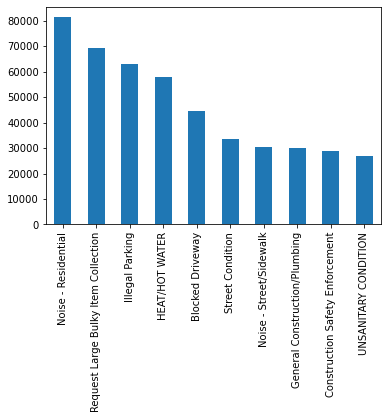

In [64]:
complaint_count[:10].plot(kind="bar")

<hr>

<u>Exploring noise complaints</u>

In [67]:
noise_complaints = complaints[complaints["Complaint Type"] == "Noise - Street/Sidewalk"]

In [69]:
noise_complaints.head(1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
814,41699264,02/14/2019 04:08:57 AM,02/14/2019 06:58:38 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10128,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.785866,-73.950929,"(40.7858664, -73.9509287)"


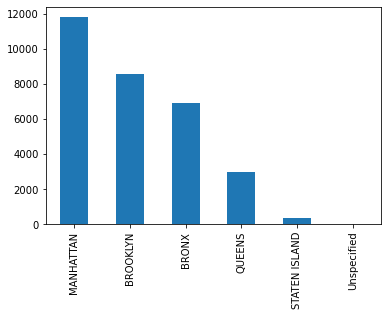

In [100]:
noise_complaints_count = noise_complaints["Borough"].value_counts()
noise_complaints_count.plot(kind="bar")

In [101]:
# Boolean Indexing
is_noise = complaints["Complaint Type"] == "Noise - Street/Sidewalk"
in_manhattan = complaints["Borough"] == "MANHATTAN"

In [102]:
complaints[is_noise & in_manhattan][:5]
complaints[is_noise & in_manhattan][["Complaint Type", "Created Date", "Incident Address"]].head(5)

,Complaint Type,Created Date,Incident Address
814,Noise - Street/Sidewalk,02/14/2019 04:08:57 AM,NaN
819,Noise - Street/Sidewalk,02/14/2019 04:44:51 AM,1127 3 AVENUE
1222,Noise - Street/Sidewalk,02/14/2019 11:07:32 PM,241 EAST 24 STREET
2225,Noise - Street/Sidewalk,02/14/2019 09:54:40 PM,318 WEST 118 STREET
2638,Noise - Street/Sidewalk,02/14/2019 05:10:18 PM,2 BROADWAY


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


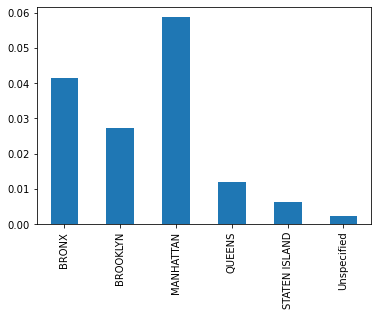

In [105]:
complaints_count = complaints["Borough"].value_counts()

print(type(noise_complaints_count),
      type(complaints_count),
     sep="\n")

(noise_complaints_count/complaints_count).plot(kind="bar")